In [1]:

# This is lzl's snippet for diploma project
import math
import os,shutil
import random
import warnings
import gc
import heapq

import geopandas as gpd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shapely
import seaborn as sns
from shapely.geometry import LineString, Point, Polygon
from shapely.wkt import dumps, loads
from tqdm import tqdm

import traProject as tp
from traProject.analysisFuns import statisticFuns as sfuns
from traProject.basicFuns import CalFuns as cfun,VisFuns as vfun,DataProcessingFuns as dfun
from traProject.classificationFuns import model_feature_selection as mfs
import traProject.utils as tu

random.seed(1229)

# plt.style.use('seaborn')
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

warnings.filterwarnings("ignore")

picOut='../../output/pic/paper/'


# 生成特征集

vTopNmode=2时，分位数的确定

In [2]:
path0=tu.getSample(sampleSize=list(np.linspace(0,0.9,10)))

<AxesSubplot:xlabel='hour', ylabel='speed2'>

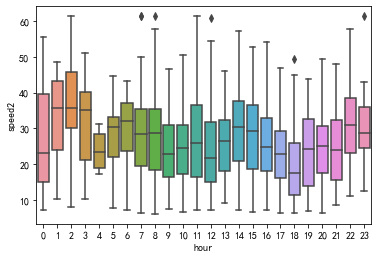

In [20]:
path1=tu.getFileNames(path0)[4]+'/'
path2=tu.getFileNames(path1)
test=pd.read_csv(path2[-2])
# test.groupby('hour').speed2.quantile(0.5)
sns.boxplot(test['hour'],test['speed2'])

In [13]:
# road_all=pd.read_csv('../../output/paper/武汉路网/WUHAN_new.csv')
versionList=[0,1,2]
PtsOrTraList=['Pts','Tra']
velocityNameList=['velocity','velocity1']
dropViaductList=[True,False]
dropWifiList=[True,False]
# vTopNModeList=[1,2]

# version=0
PtsOrTra='Pts'
# velocityName='velocity'
dropViaduct=True
dropWifi=True
# vTopNMode=2
# percent=0.75
percentList=[0.5]
vTopNModeList=['1_0.5']
vTopNModeList.extend('2_%s'%i for i in percentList)

outfile='../../output/paper/FE/'

for version in versionList:
    sname='speed%s'%version
    for vTopNModestr in vTopNModeList:
        vTopNMode=int(vTopNModestr.split('_')[0])
        percent=float(vTopNModestr.split('_')[1])
        for velocityName in velocityNameList:
            versionName='%s_dropViaduct=%s_dropWifi=%s_vTopNmode=%s_velocity=%s'%(sname,dropViaduct,dropWifi,vTopNModestr,velocityName)
            fatherfiles=tu.getFileNames('../../output/paper/tra_linkid/tra_link_id_v%s_%s_minN=50_bufR=1e-05_dropWifi=False_velocity=%s/'%(version,PtsOrTra,velocityName))
            for fa in tqdm(fatherfiles):
                files=tu.getFileNames(fa+'/')
                for file in files:
                    tu.genDataSet1(file,
                                '../../output/paper/wuhan_road/WUHAN_new.csv',
                                outfile=tu.pathCheck(outfile),
                                speedName=sname,
                                dname='tra_%s'%(versionName),
                                attrNames=['Sdis','Xdis','RC','viaduct','fclass'],
                                minPNum=50,
                                dropViaduct=dropViaduct,   
                                dropWifi=dropWifi,
                                vTopNMode=vTopNMode,
                                percent=percent
                                )

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [01:42<00:00, 14.59s/it]


Now tuning Random Forest. Go grab a beer or something.
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 feat

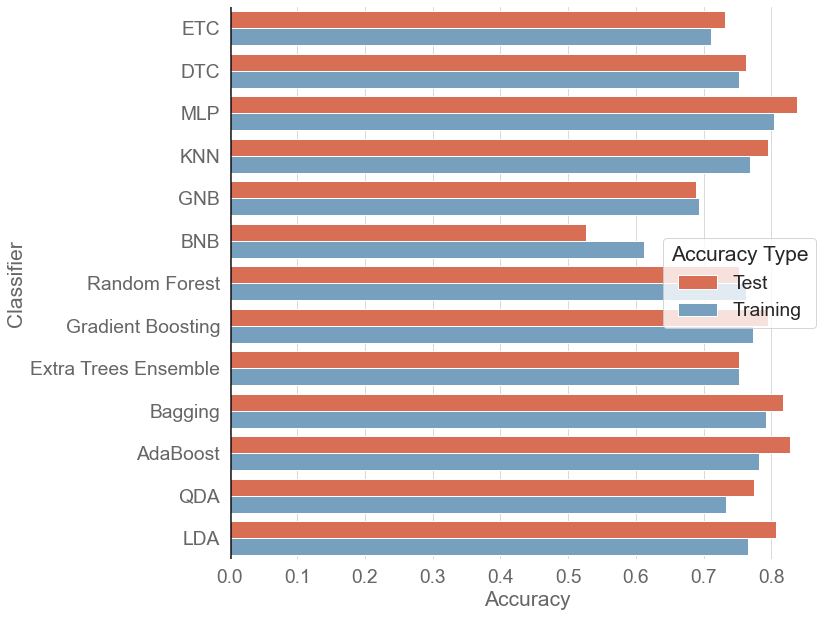

In [6]:
mfs.main('../../output/paper/FE_test/','../../output/paper/models_test/')

In [3]:
# road_all=pd.read_csv('../../output/paper/武汉路网/WUHAN_new.csv')
versionList=[2]
PtsOrTraList=['Pts','Tra']
velocityNameList=['velocity','velocity1']
dropViaductList=[True,False]
dropWifiList=[True,False]
vTopNModeList=[1,2]

# version=0
PtsOrTra='Pts'
# velocityName='velocity'
dropViaduct=True
dropWifi=True
# vTopNMode=2
percent=0.75

outfile='../../output/paper/特征测试1/'
for vTopNMode in vTopNModeList:
    for version in versionList:
        sname='speed%s'%version
        for velocityName in velocityNameList:
            versionName='%s_dropViaduct=%s_dropWifi=%s_vTopNmode=%s_velocity=%s'%(sname,dropViaduct,dropWifi,vTopNMode,velocityName)
            if vTopNMode==2:
                versionName+='_percent=%s'%percent
            fatherfiles=tu.getFileNames('../../output/paper/轨迹_按link_id1_v%s_%s_minN=50_bufR=1e-05_dropWifi=False_velocity=%s/'%(version,PtsOrTra,velocityName))
            for fa in tqdm(fatherfiles):
                files=tu.getFileNames(fa+'/')
                for file in files:
                    tu.genDataSet1(file,
                                '../../output/paper/武汉路网/WUHAN_new.csv',
                                outfile=tu.pathCheck(outfile),
                                speedName=sname,
                                dname='tra1_%s'%(versionName),
                                attrNames=['Sdis','Xdis','RC','viaduct'],
                                minPNum=50,
                                dropViaduct=dropViaduct,   
                                dropWifi=dropWifi,
                                vTopNMode=vTopNMode,
                                percent=percent
                                )

100%|██████████████████████████████████████████████████████████████████████████████████████| 7/7 [02:22<00:00, 20.32s/it]


# 特征筛选1

In [9]:
def visF1(test):
    print(len(test))
    plt.figure(dpi=300,figsize=[22,16])
    sns.heatmap(test.corr(),cmap='spring',annot=True)
    
def visF2(test,pFeature='Vmean'):
    print(len(test))
    gs=test.groupby('maxspeed')
    fig,ax=plt.subplots(len(gs),1,dpi=300,figsize=[12,1*len(gs)],sharex=True)
    i=0
    for name,g in gs:
        ax[i].hist(g[pFeature],alpha=0.3)
        ax[i].axvline(x=int(name),ls=':',c='r')
        ax[i].set_title('maxspeed=%s,Feature=%s'%(name,pFeature))
        i+=1
    plt.tight_layout()
    
# test=trans_data(onehot_y=False)
test=pd.read_csv('../../output/paper/特征测试1/特征测试_speed0_speed0_dropViaduct=True_dropWifi=True_vTopNmode=2_velocity=velocity1.csv')
# test.maxspeed=test.maxspeed.astype(str)
test=dfun.trans_data(test,onehot_x=False,minmax_x=False,onehot_y=False,minN=2)
# test=test[test.maxspeed.isin([60,70,80])]
y=test['maxspeed']
x=test.drop('maxspeed',axis=1)
# test['VTop01']=test['VTop0']*test['VTop1']
# test['VTop02']=test['VTop0']*test['VTop0']
# test['Vmean1']=test.apply(lambda x:(2*x.VTop0+x.Vmean)/3 if x.VTop0>60 else (x.VTop0+x.Vmean)/2,axis=1)

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

pip_params = {'poly_features__degree':[1,2,3],'poly_features__interaction_only':[True,False],'classify__n_neighbors':[3,4,5,6]}

poly = PolynomialFeatures(include_bias=False)
knn = KNeighborsClassifier()
pipe = Pipeline([('poly_features',poly),('classify',knn)])

grid = GridSearchCV(pipe,pip_params)
grid.fit(x,y)

print(grid.best_score_,grid.best_params_)


0.7915696320447136 {'classify__n_neighbors': 3, 'poly_features__degree': 3, 'poly_features__interaction_only': False}


1251


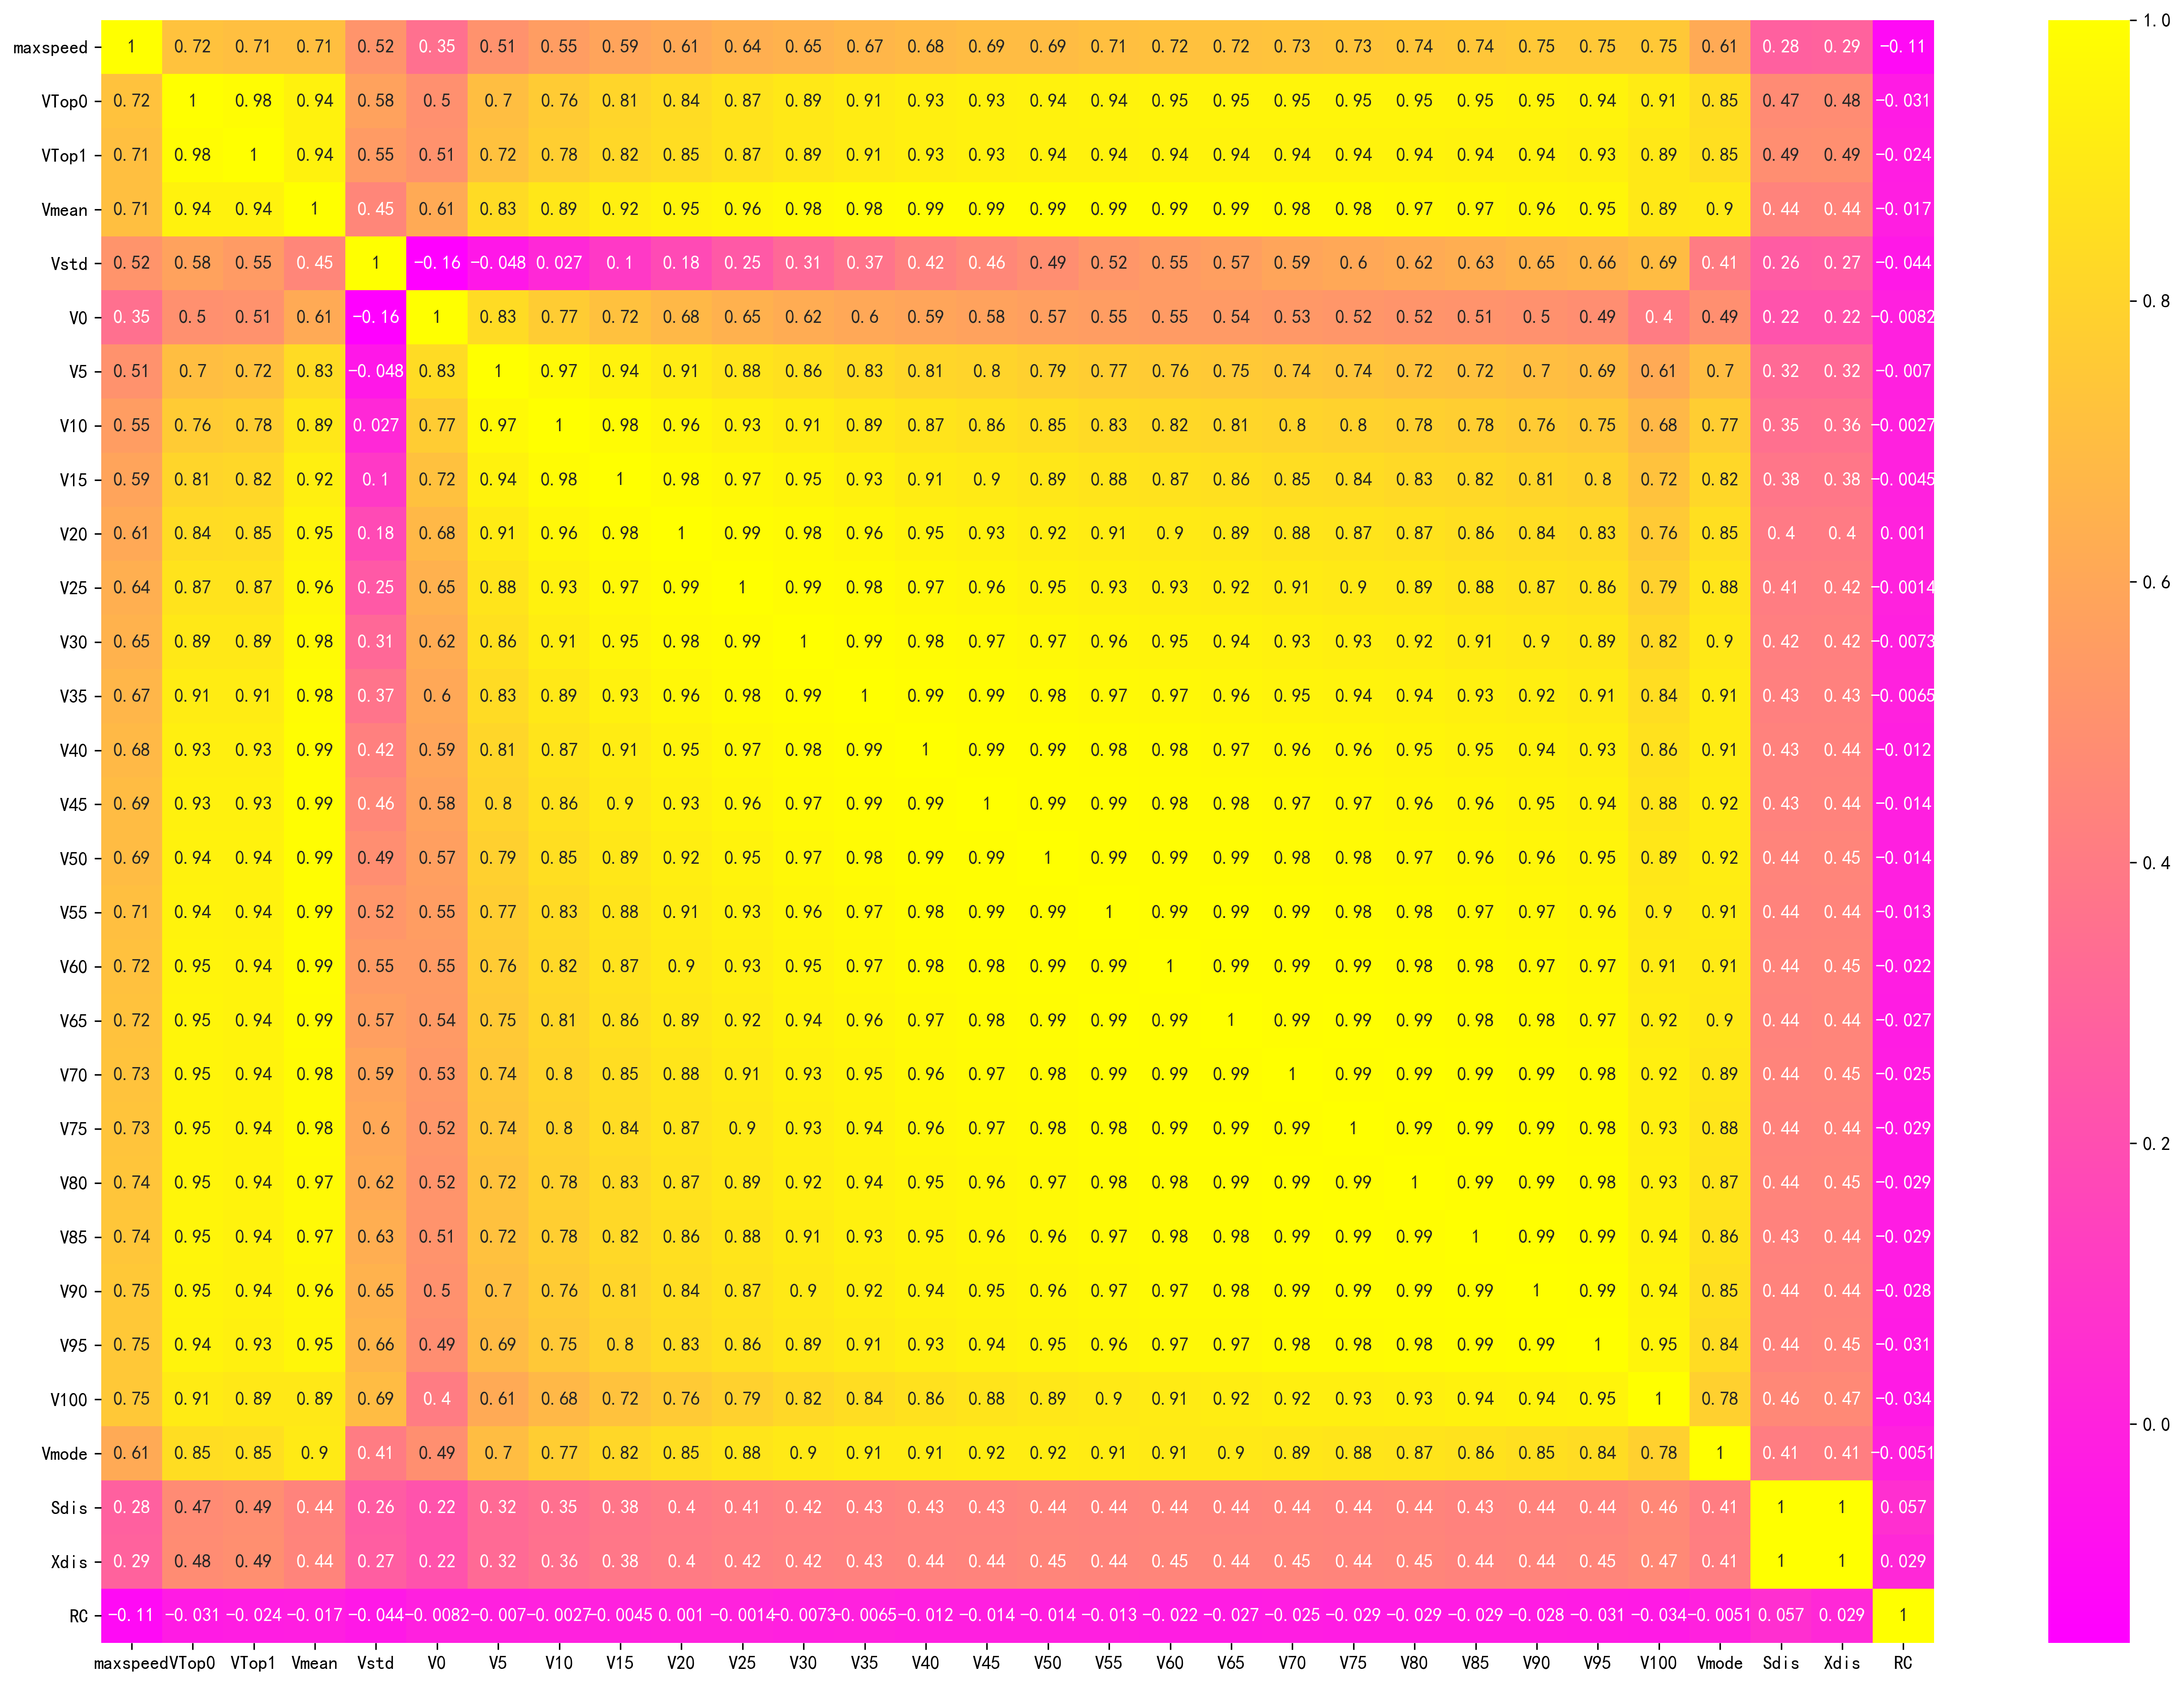

In [10]:
# visF1(test)
visF1(test)

1164


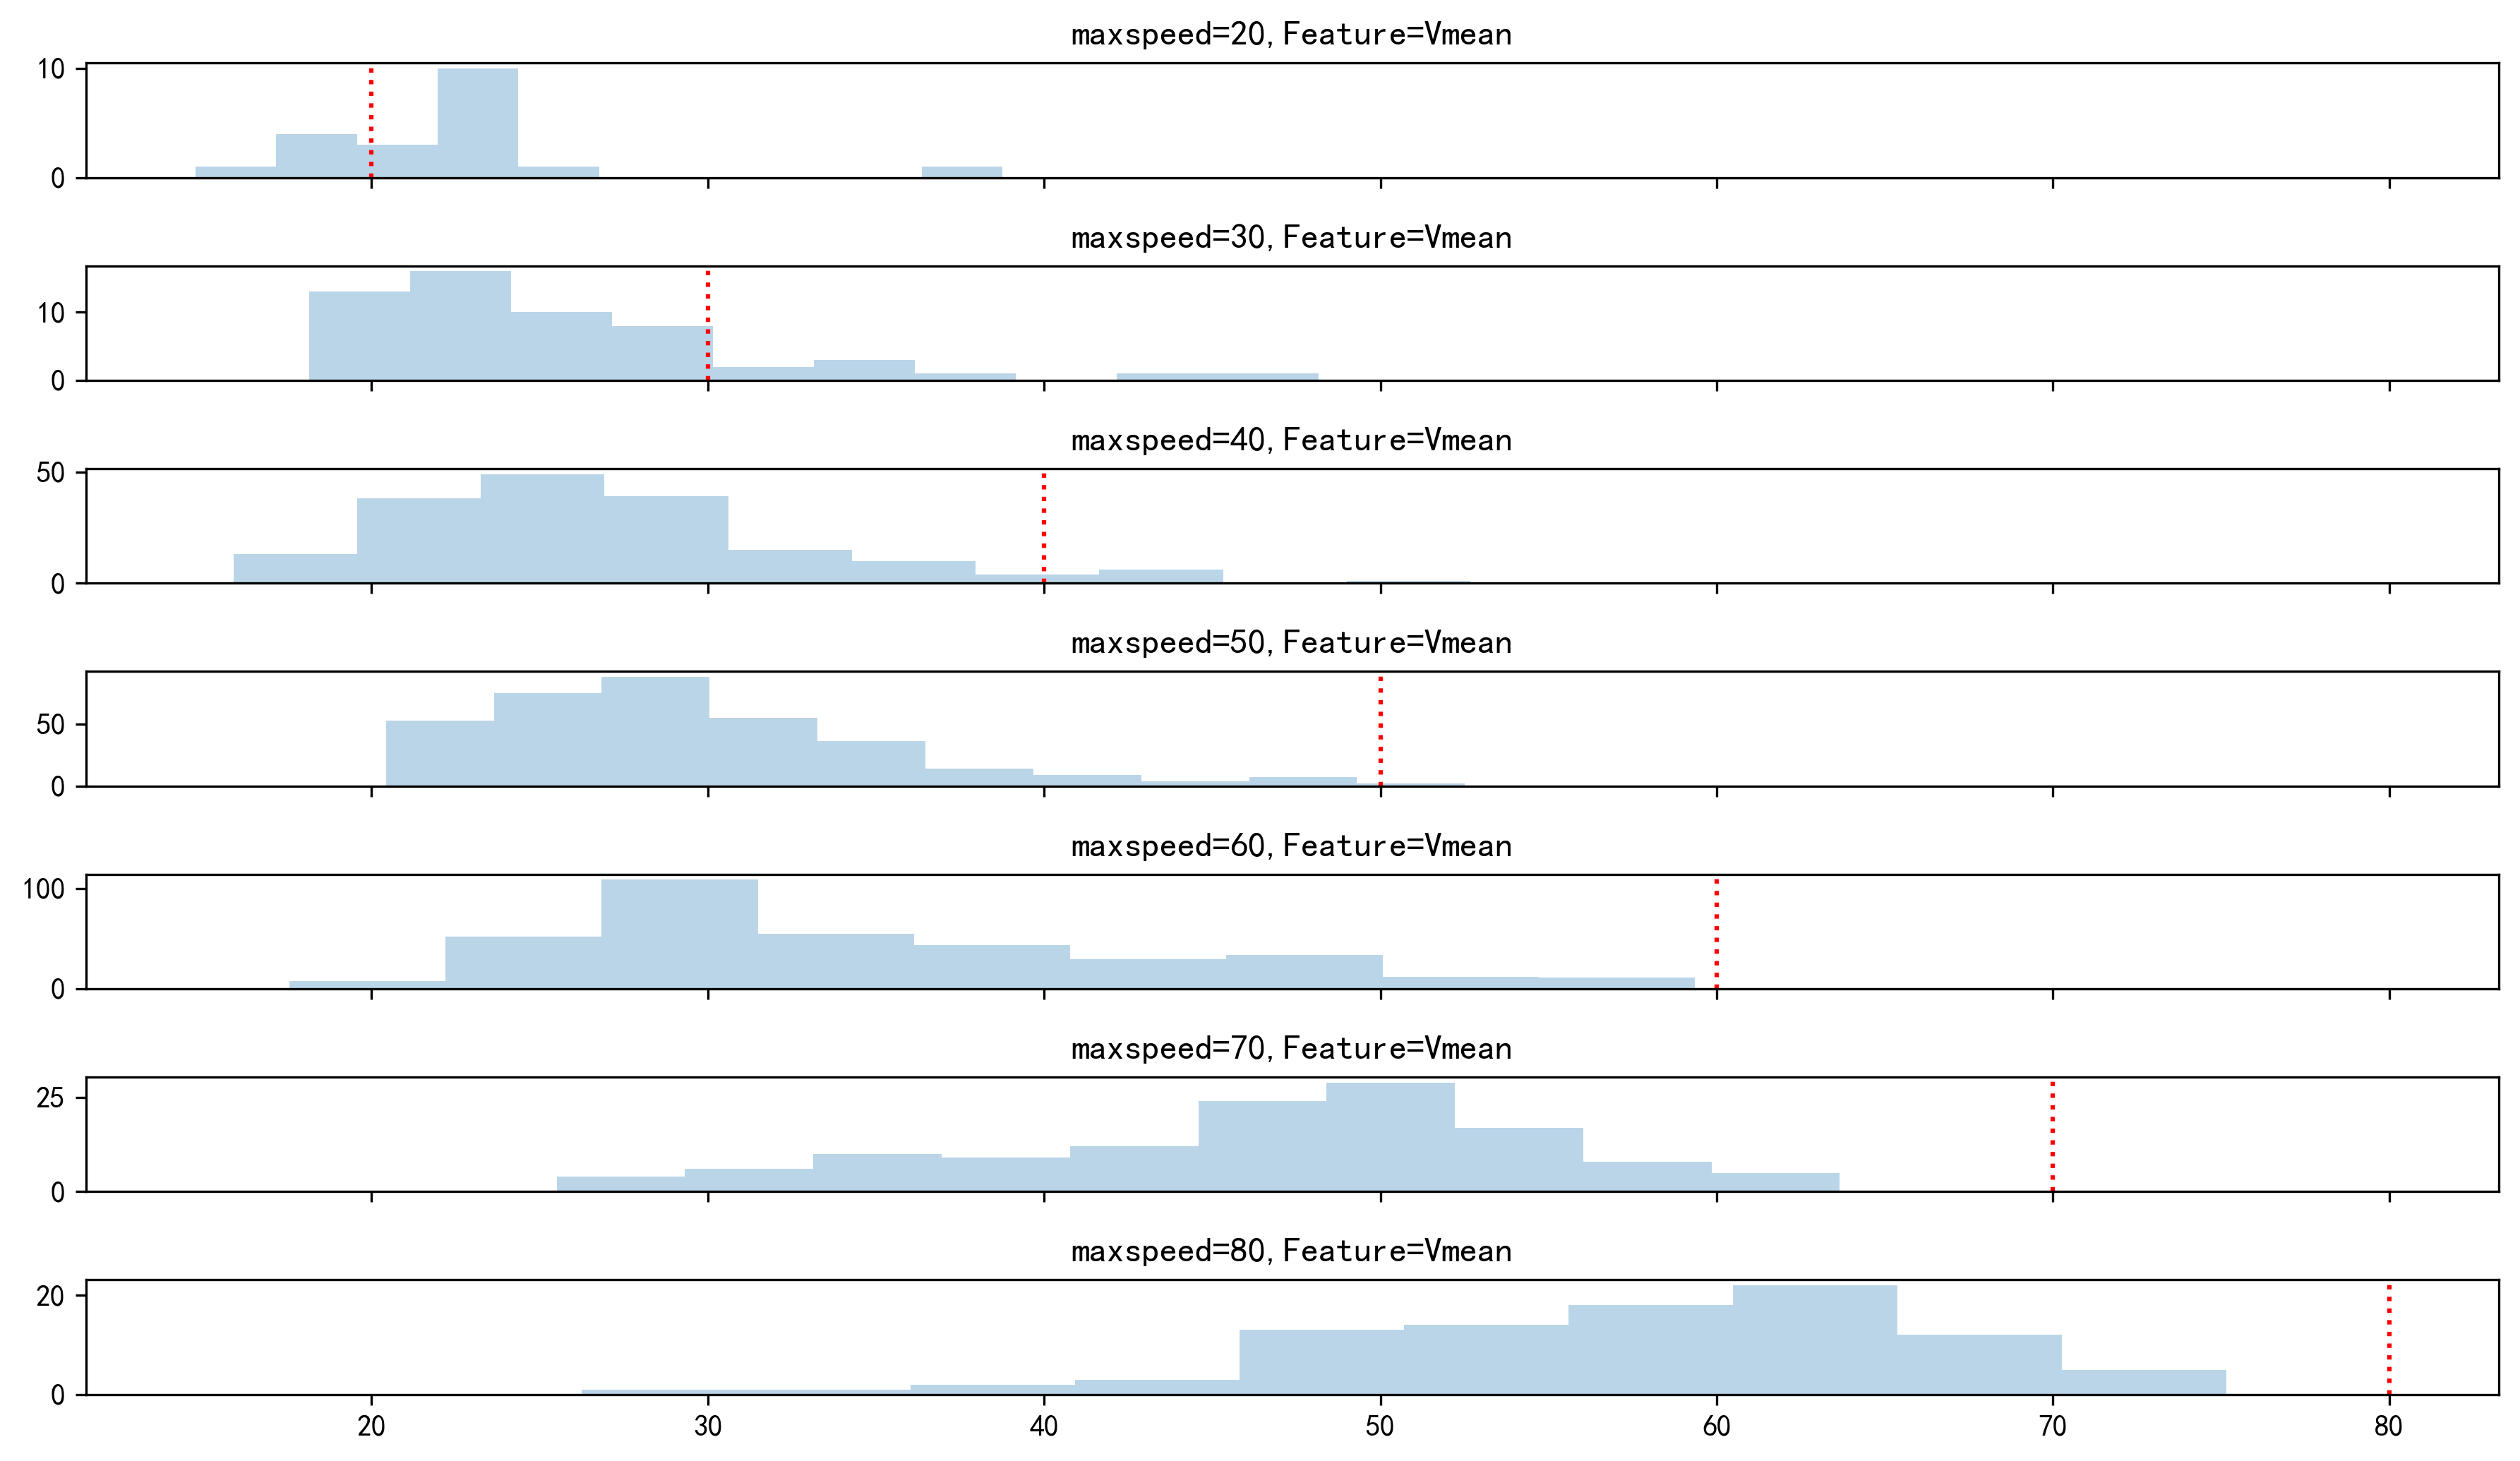

In [9]:
visF2(test,'Vmean')

906


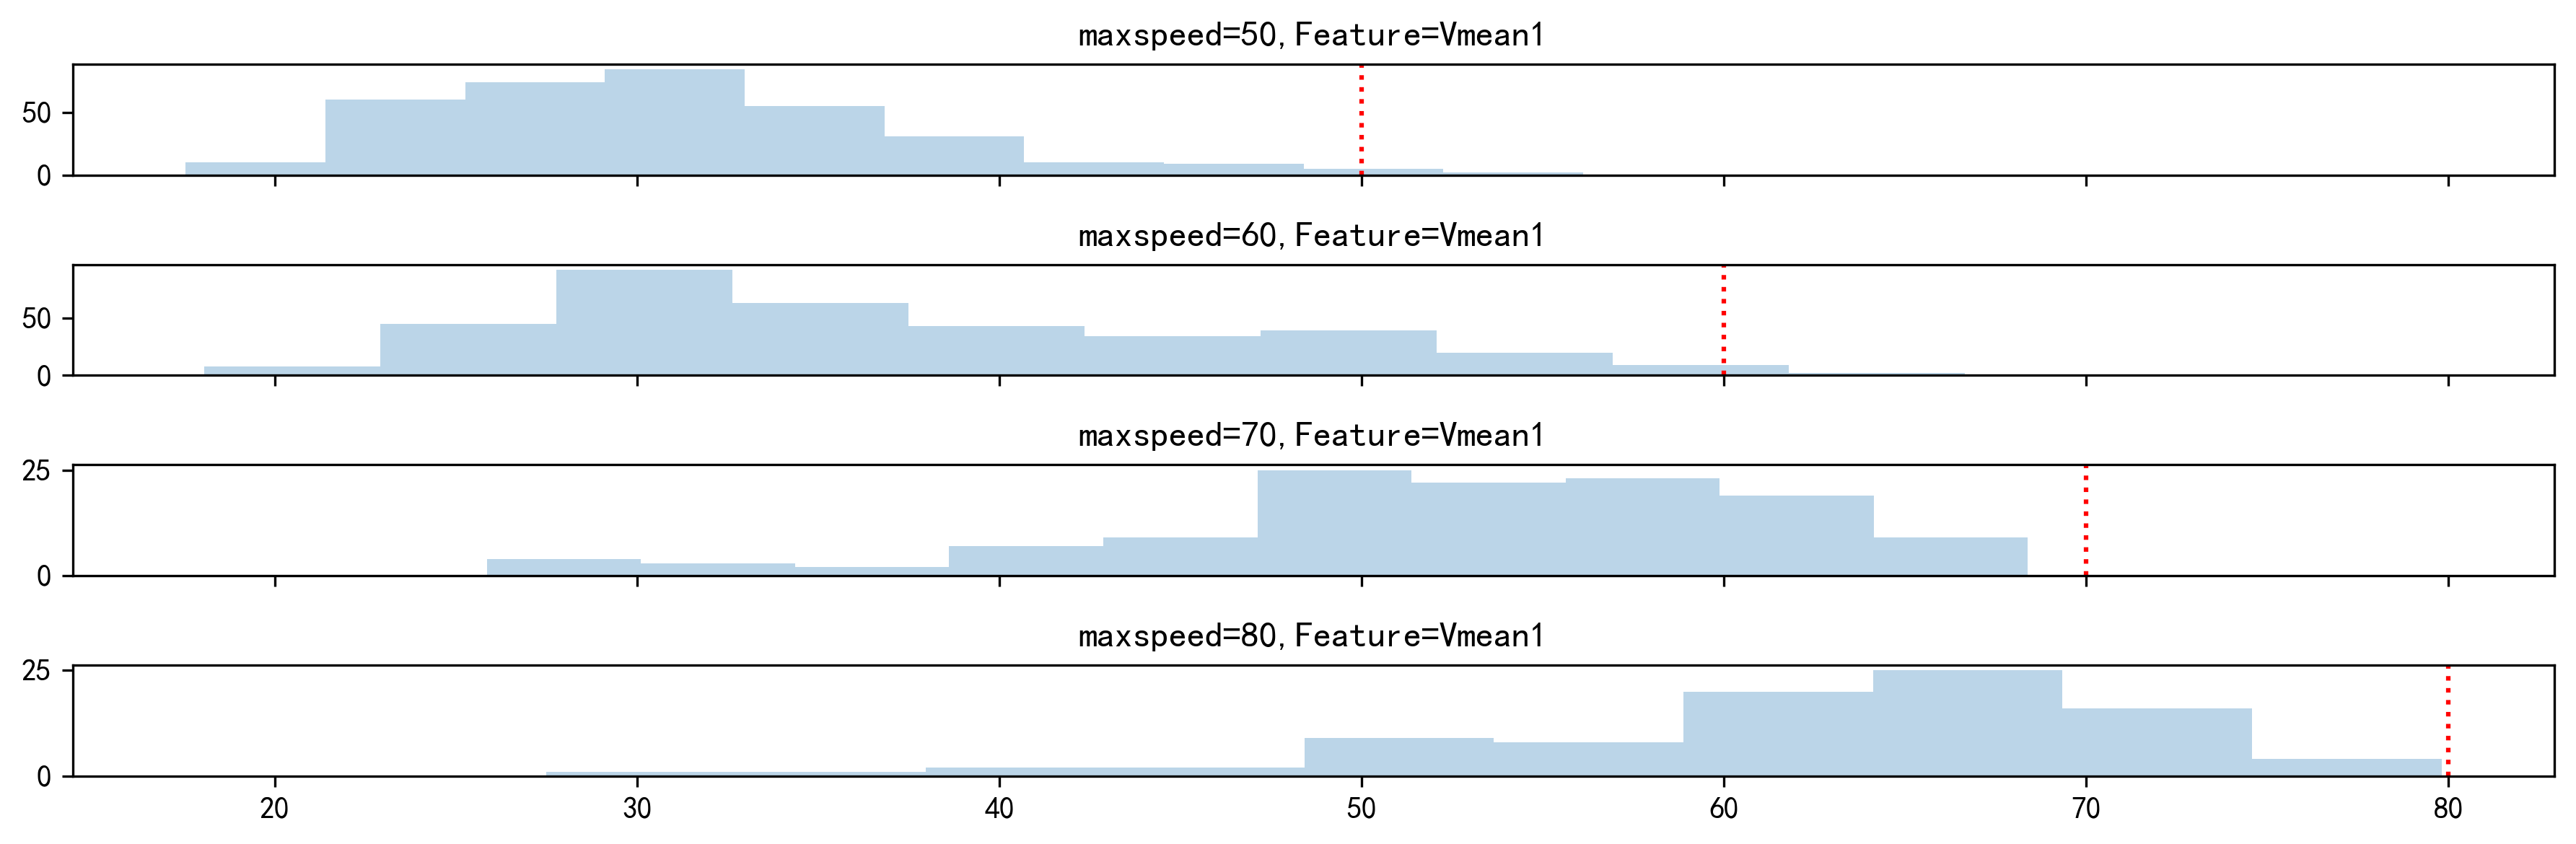

In [33]:
visF2(test,'Vmean1')
# plt.savefig(picOut+'样本高位速度特征分布情况_按轨迹')

# 特征筛选2 Wrapper法

100%|████████████████████████████████████████████████████████████████████████████████████| 28/28 [00:16<00:00,  1.72it/s]


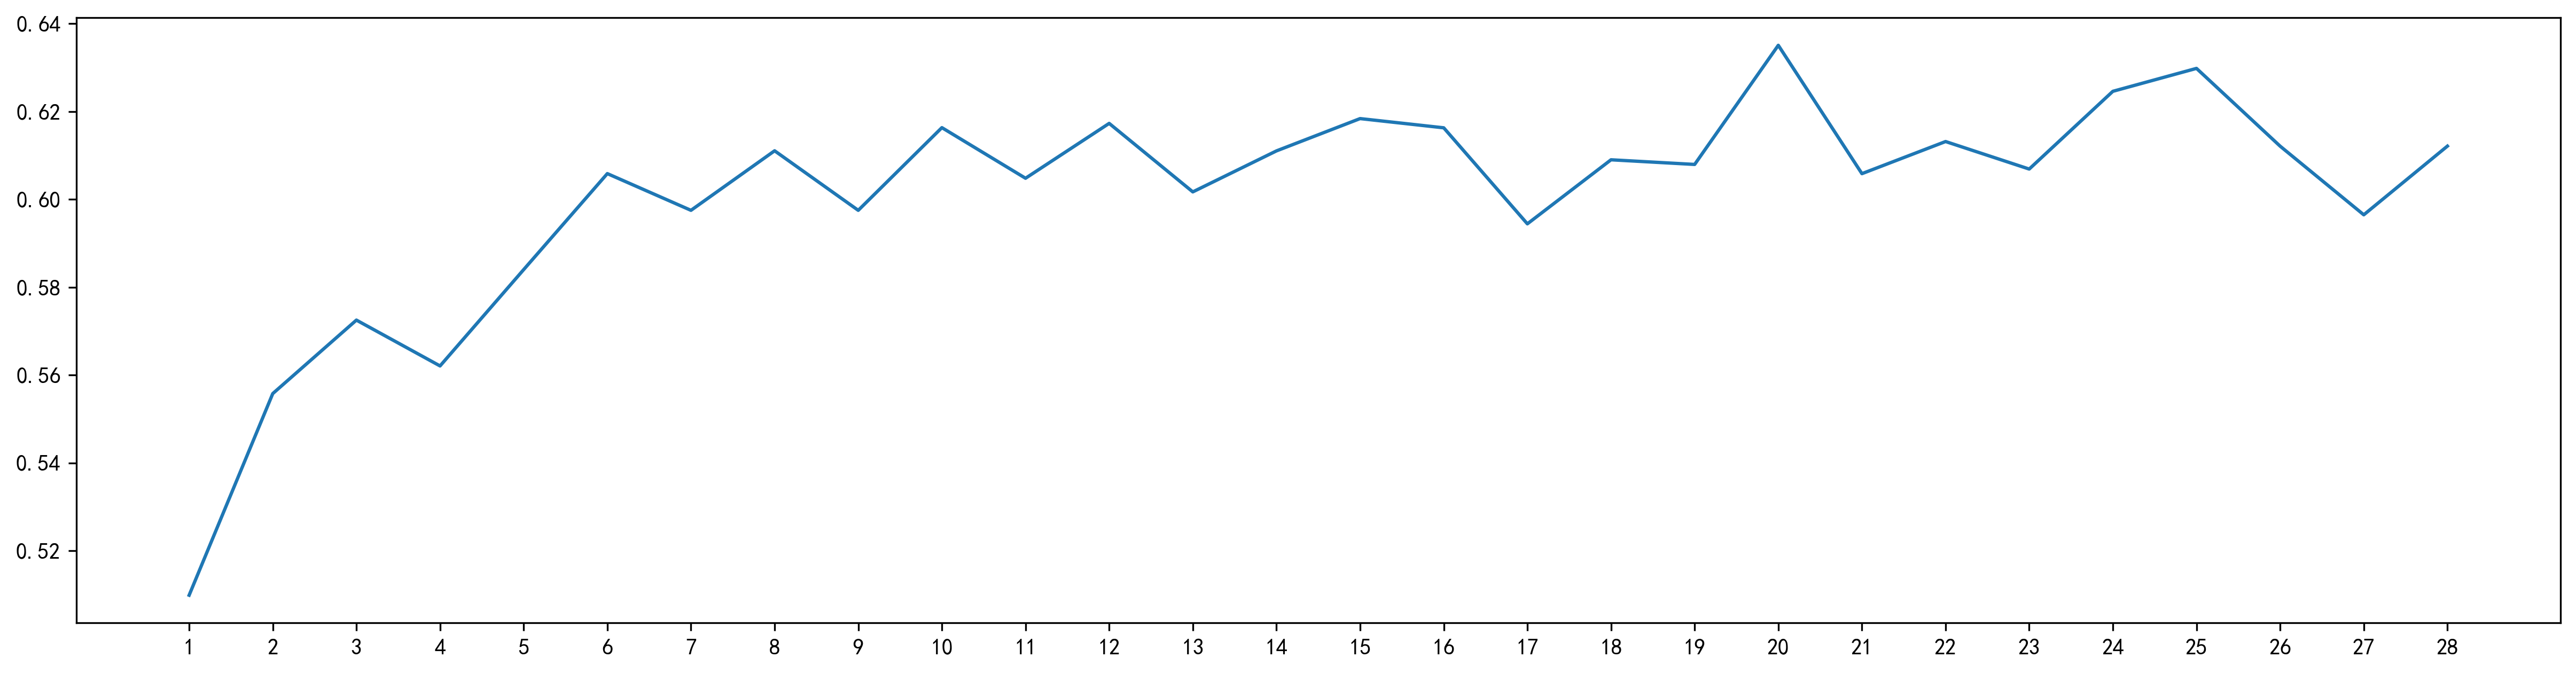

20 0.6350894415357766


In [122]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=1229
RFC_ = RFC(n_estimators =10,random_state=RANDOM_STATE)

data=pd.read_csv('../../output/paper/特征测试1/特征测试_speed2_dropViaduct=True_dropWifi=True_vTopNmode=2_velocity=velocity1.csv')
data=dfun.trans_data(data,onehot_x=False,minmax_x=False,onehot_y=False,minN=1)
data=data[data.maxspeed.isin([50,60,70,80])]
y=data['maxspeed']
X=data.drop('maxspeed',axis=1)
fnum=X.shape[1]+1

score = []
for i in tqdm(range(1,fnum)):
    X_wrapper = RFE(RFC_,n_features_to_select=i).fit_transform(X,y)
    once = cross_val_score(RFC_,X_wrapper,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5],dpi=300)
plt.plot(range(1,fnum),score)
plt.xticks(range(1,fnum))
plt.show()
print(score.index(max(score))+1,max(score))

100%|████████████████████████████████████████████████████████████████████████████████████| 29/29 [00:05<00:00,  4.96it/s]


<Figure size 6000x1500 with 0 Axes>

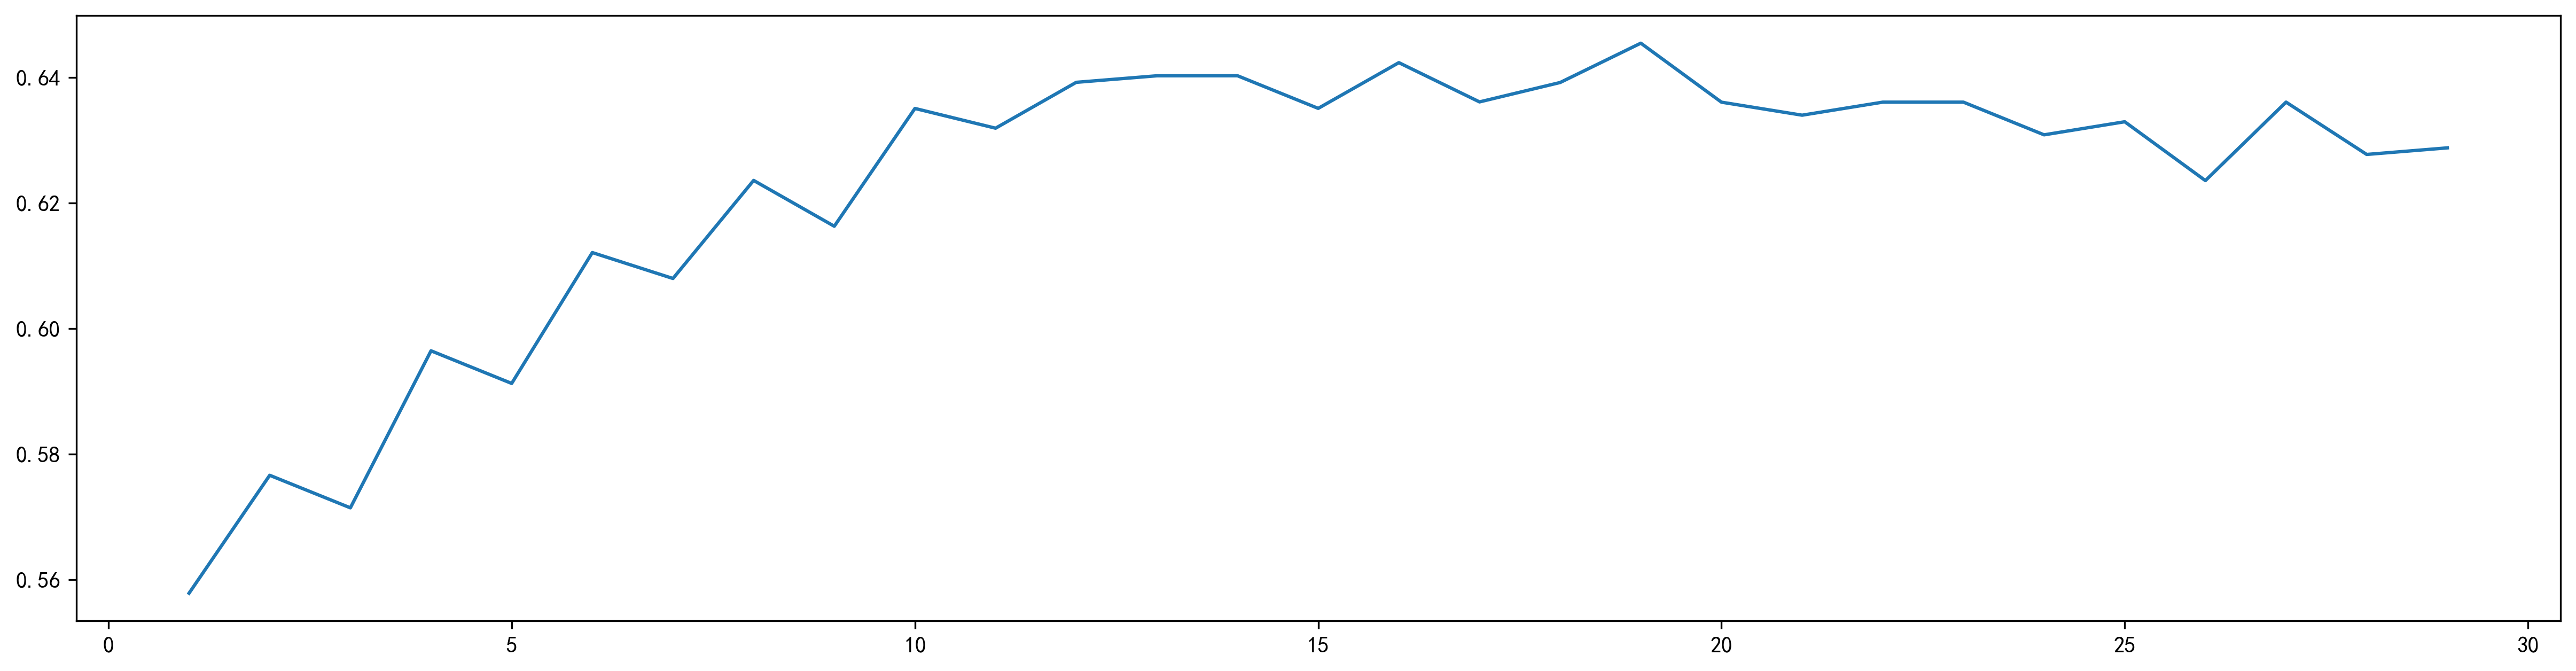

18 0.6454897469458988


In [124]:
X_wrapper = RFE(RFC(n_estimators =10,random_state=RANDOM_STATE),n_features_to_select=20).fit_transform(X,y)
score1=[]
for i in tqdm(range(1,30)):
    once = cross_val_score(RFC(i,random_state=RANDOM_STATE),X_wrapper,y,cv=5).mean()
    score1.append(once)
plt.figure(figsize=[20,5],dpi=300)
plt.figure(figsize=[20,5],dpi=300)
plt.plot(range(1,30),score1)
# plt.xticks(range(1,fnum))
plt.show()
print(score1.index(max(score1)),max(score1))

## 特征筛选3 交叉特征

In [133]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.feature_selection import RFECV

data=pd.read_csv('../../output/paper/特征测试1/特征测试_speed2_dropViaduct=True_dropWifi=True_vTopNmode=2_velocity=velocity1.csv')
data=dfun.trans_data(data,onehot_x=False,minmax_x=False,onehot_y=False,minN=1)
data=data[data.maxspeed.isin([50,60,70,80])]
y=data['maxspeed']
X=data.drop('maxspeed',axis=1)
fnum=X.shape[1]+1

pip_params = {'polynomialfeatures__degree':[1,2,3],
              'polynomialfeatures__interaction_only':[True,False]}

poly = PolynomialFeatures(include_bias=False)
RFC_ = RFC(n_estimators =10,random_state=RANDOM_STATE)

# X_wrapper = RFE(RFC(n_estimators =10,random_state=RANDOM_STATE),n_features_to_select=20).fit_transform(X,y)
rfecv = RFECV(estimator=RFC_, step=1, cv=StratifiedKFold(2),
              scoring='accuracy')
# X_wrapper=rfecv.fit_transform(X, y)

pipe = make_pipeline(poly
#                      ,StandardScaler()
                     ,rfecv
                     ,RFC(9,random_state=RANDOM_STATE)
                    )

grid = GridSearchCV(pipe,pip_params)
grid.fit(X_wrapper,y)

print(grid.best_score_,grid.best_params_)


0.6131926265270506 {'polynomialfeatures__degree': 1, 'polynomialfeatures__interaction_only': True}


Optimal number of features : 20


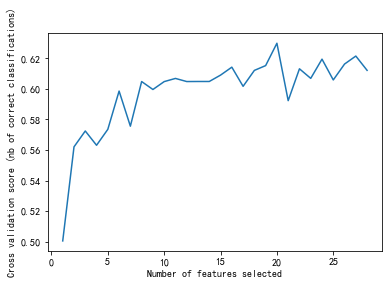

In [111]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.datasets import make_classification


# Build a classification task using 3 informative features
data=pd.read_csv('../../output/paper/特征测试1/特征测试_speed2_dropViaduct=True_dropWifi=True_vTopNmode=2_velocity=velocity1.csv')
data=dfun.trans_data(data,onehot_x=False,minmax_x=False,onehot_y=False,minN=1)
data=data[data.maxspeed.isin([50,60,70,80])]
y=data['maxspeed']
X=data.drop('maxspeed',axis=1)
fnum=X.shape[1]+1

RANDOM_STATE=1229
es = RFC(n_estimators =10,random_state=RANDOM_STATE)
# es = SVC(kernel="linear")
# The "accuracy" scoring is proportional to the number of correct
# classifications

min_features_to_select = 1  # Minimum number of features to consider
rfecv = RFECV(estimator=es, step=1, cv=StratifiedKFold(5),
              scoring='accuracy',
              min_features_to_select=min_features_to_select)
rfecv.fit(X, y)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(min_features_to_select,
               len(rfecv.grid_scores_) + min_features_to_select),
         rfecv.grid_scores_)
plt.show()